In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
customers = pd.read_csv(r"C:\Users\ADMIN\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\ADMIN\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\ADMIN\Downloads\Transactions.csv")

In [15]:
print("Customers dataset:")
print(customers.info())
print(customers.head())

print("\nProducts dataset:")
print(products.info())
print(products.head())

print("\nTransactions dataset:")
print(transactions.info())
print(transactions.head())

Customers dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

In [16]:
print("\nMissing values:")
print("Customers:")
print(customers.isnull().sum())
print("\nProducts:")
print(products.isnull().sum())
print("\nTransactions:")
print(transactions.isnull().sum())


Missing values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [17]:
print("\nChecking for duplicates:")
print("Customers duplicates:", customers.duplicated().sum())
print("Products duplicates:", products.duplicated().sum())
print("Transactions duplicates:", transactions.duplicated().sum())


Checking for duplicates:
Customers duplicates: 0
Products duplicates: 0
Transactions duplicates: 0


In [18]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [19]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [20]:
print("\nDescriptive statistics for numerical columns:")
print(merged_data.describe())


Descriptive statistics for numerical columns:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.950

In [21]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 selling products:")
print(top_products)


Top 10 selling products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [23]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by region:")
print(revenue_by_region)


Revenue by region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [24]:
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()

In [25]:
transactions_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()

In [26]:
sns.set(style="whitegrid")

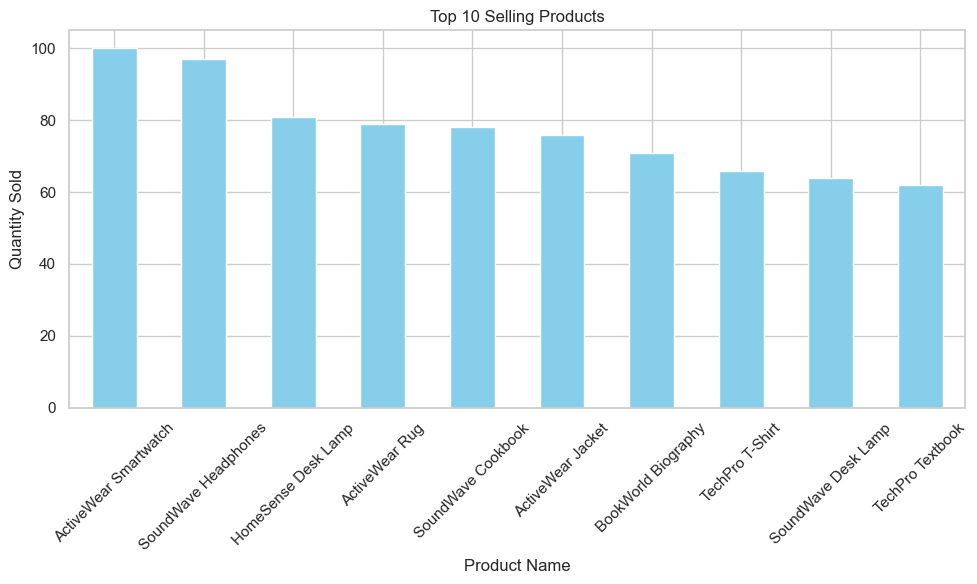

In [27]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Products")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

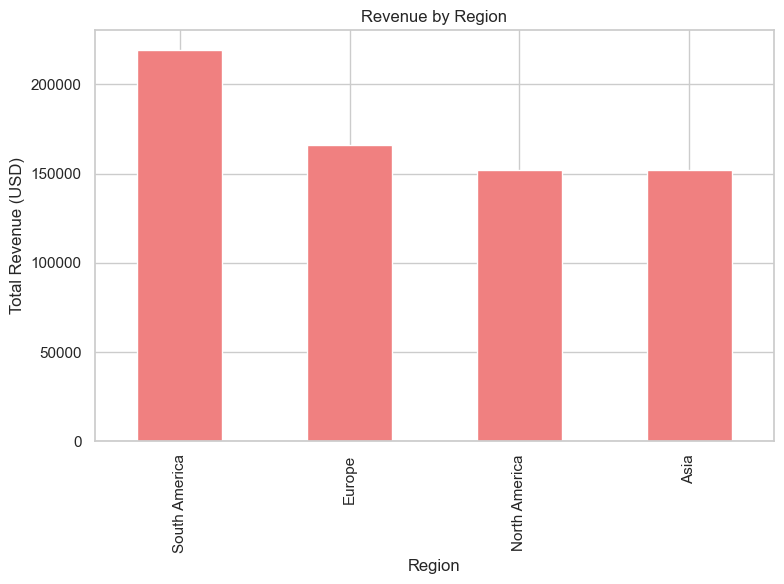

In [28]:
plt.figure(figsize=(8, 6))
revenue_by_region.plot(kind='bar', color='lightcoral')
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

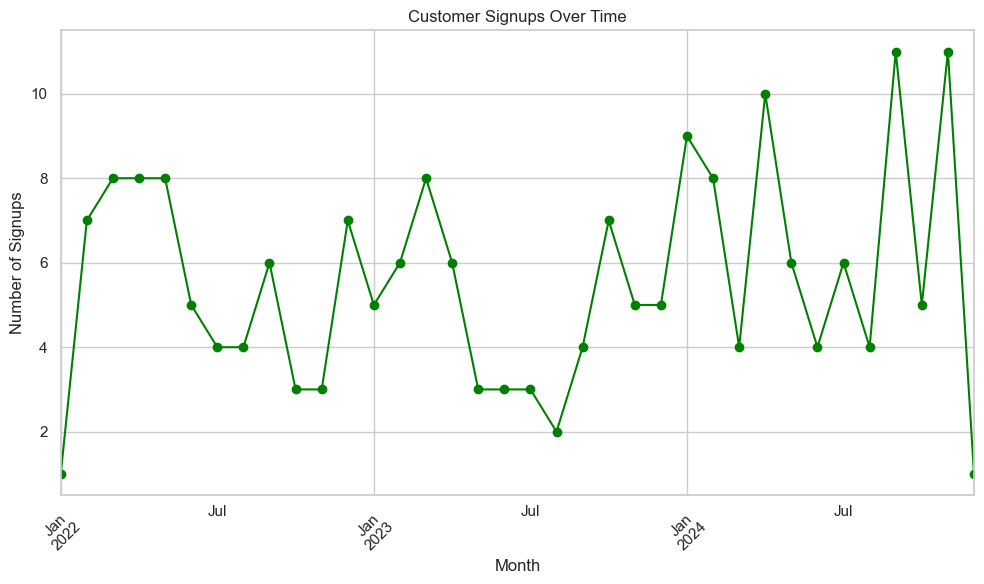

In [29]:
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o', color='green')
plt.title("Customer Signups Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

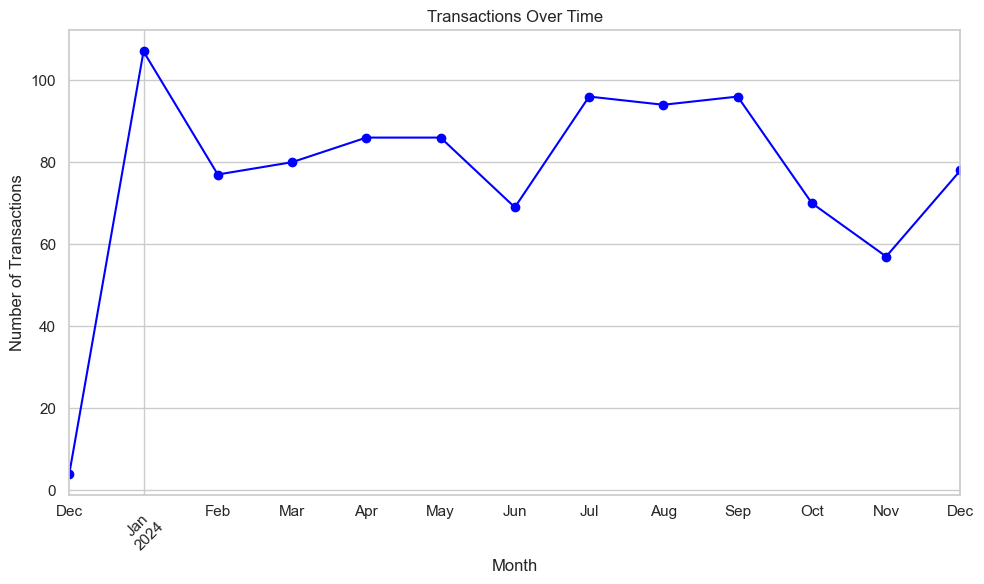

In [30]:
plt.figure(figsize=(10, 6))
transactions_trend.plot(kind='line', marker='o', color='blue')
plt.title("Transactions Over Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
insights = [
    "The top-selling product category contributes significantly to revenue. These products should be promoted further.",
    "Region-wise revenue shows a clear leader, indicating potential for localized marketing strategies.",
    "Customer signups have seasonal trends, suggesting promotional campaigns should align with these peaks.",
    "Transactions have increased steadily, indicating growing customer activity over time.",
    "Certain product categories dominate sales; diversifying offerings could improve revenue.",
]


In [32]:
print("\nKey Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Key Insights:
1. The top-selling product category contributes significantly to revenue. These products should be promoted further.
2. Region-wise revenue shows a clear leader, indicating potential for localized marketing strategies.
3. Customer signups have seasonal trends, suggesting promotional campaigns should align with these peaks.
4. Transactions have increased steadily, indicating growing customer activity over time.
5. Certain product categories dominate sales; diversifying offerings could improve revenue.
